# Proyecto de agrupación de clientes

In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
clientes_raw = pd.read_csv(r"..\data\raw\customer_segmentation.csv")
clientes = clientes_raw.copy()

In [79]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [80]:
clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [81]:
clientes['Dt_Customer'] = pd.to_datetime(clientes['Dt_Customer'], format ='%d-%m-%Y')

In [82]:
clientes['AcceptedCmp1'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp2'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp3'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp4'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp5'] = clientes['AcceptedCmp1'].astype('category')

In [83]:
clientes['Complain'] = clientes['Complain'].astype('category')
clientes['Response'] = clientes['Response'].astype('category')
clientes['Education'] = clientes['Education'].astype('category')
clientes['Marital_Status'] = clientes['Marital_Status'].astype('category')



In [84]:
clientes['ID'] = clientes['ID'].astype('category')

In [85]:
#Validando si existen ID's repetidos
clientes[clientes.duplicated(subset='ID', keep= False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [86]:
clientes[clientes.isna().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [87]:
clientes.groupby(by=['Education'])['Income'].mean()

C:\Users\JoseHerrera\AppData\Local\Temp\ipykernel_23744\3777795359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes.groupby(by=['Education'])['Income'].mean()


Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [88]:
clientes['Income']= clientes['Income'].fillna(clientes.groupby(by=['Education'])['Income'].transform('mean'))

C:\Users\JoseHerrera\AppData\Local\Temp\ipykernel_23744\2008916126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes['Income']= clientes['Income'].fillna(clientes.groupby(by=['Education'])['Income'].transform('mean'))


In [89]:
#sns.pairplot(clientes)

In [90]:
cpal = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)

<Axes: >

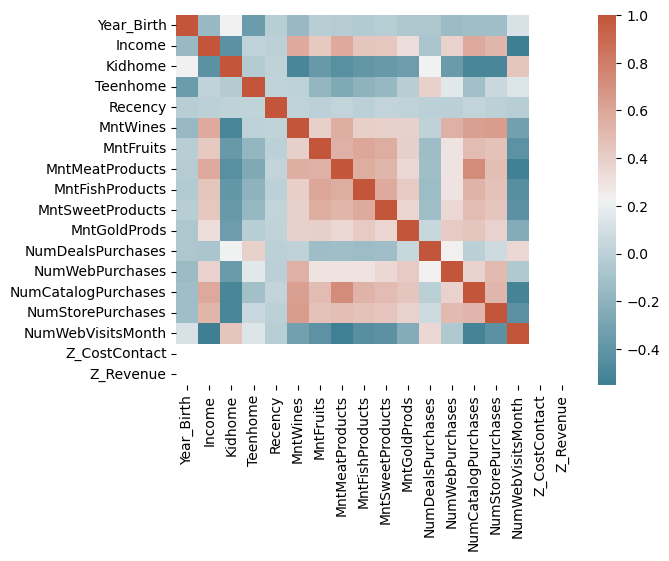

In [91]:
sns.heatmap(clientes.select_dtypes(include=np.number).corr(), cmap= cpal)

In [92]:
clientes.Z_Revenue.value_counts()
clientes.Z_CostContact

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

Las columnas Z_Revenue y Z_CostContact son elementos constantes, y debido a ello no representan ninguna ingerencia o correlación con las demás variables. Por ende se eliminarán dichos campos.

In [93]:
for column in clientes.select_dtypes(exclude=np.number).columns:
    print(clientes[column].value_counts())


ID
0        1
7375     1
7348     1
7349     1
7352     1
        ..
3698     1
3697     1
3696     1
3690     1
11191    1
Name: count, Length: 2240, dtype: int64
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: count, Length: 663, dtype: int64
AcceptedCmp3
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp4
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp5
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp2
0    2096
1     144
Name: count, dtype: int64
Com

In [94]:
clientes = clientes[~clientes['Marital_Status'].isin(['Alone', 'Absurd','YOLO'])]

In [95]:
clientes['AcceptedCmp1'].equals(clientes['AcceptedCmp2'])

True

In [96]:
clientes['AcceptedCmp2'].equals(clientes['AcceptedCmp3'])

True

In [97]:
clientes['AcceptedCmp3'].equals(clientes['AcceptedCmp4'])

True

In [98]:
clientes['AcceptedCmp4'].equals(clientes['AcceptedCmp5'])

True

Todas las variables son iguales, de ahí que se decide dejar sólo una de ellas.

In [99]:
clientes = clientes.drop(['AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue'], axis=1)

In [100]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [101]:
clientes.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2233.000000,2233.000000,2233.000000,2233.000000,2233,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000
mean,1968.790864,52250.373901,0.444245,0.506046,2013-07-10 10:37:08.034034688,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,43.903269,2.321093,4.081505,2.661890,5.79176,5.316167
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1959.000000,35523.000000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000
50%,1970.000000,51650.000000,0.000000,0.000000,2013-07-09 00:00:00,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000,6.000000
75%,1977.000000,68316.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.00000,20.000000
std,11.979248,25063.926042,0.538528,0.544675,NaN,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,52.009602,1.932181,2.776886,2.921749,3.25473,2.425668


In [102]:
clientes['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
747     1995
696     1995
2213    1995
46      1996
1170    1996
Name: Year_Birth, Length: 2233, dtype: int64

In [103]:
current_year = clientes['Dt_Customer'].max().year

In [104]:
clientes['Age']=current_year - clientes['Year_Birth']

In [105]:
clientes ['dias registrados'] = (clientes['Dt_Customer'].max()- clientes['Dt_Customer']).dt.days


In [106]:
clientes["MntTotal"] = clientes["MntFishProducts"] + clientes["MntFruits"] + clientes["MntGoldProds"] + clientes["MntMeatProducts"] + clientes["MntSweetProducts"] + clientes["MntWines"]

In [107]:
clientes["NumPurchases"] = clientes["NumCatalogPurchases"] + clientes["NumDealsPurchases"] + clientes["NumStorePurchases"] + clientes["NumWebPurchases"]

In [108]:
clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,1,57,663,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,60,113,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,49,312,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,30,139,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,33,161,422,19


In [109]:
clientes = clientes.drop(['Dt_Customer','Year_Birth'], axis=1)

In [110]:
clientes['Age'].sort_values()

46       18
1170     18
747      19
1850     19
2213     19
       ... 
424      73
1950     74
192     114
339     115
239     121
Name: Age, Length: 2233, dtype: int64

In [111]:
clientes['Age'] < 114

0       True
1       True
2       True
3       True
4       True
        ... 
2235    True
2236    True
2237    True
2238    True
2239    True
Name: Age, Length: 2233, dtype: bool

In [112]:
clientes [clientes['Age'] < 114]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,1,57,663,1617,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,60,113,27,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,49,312,776,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,30,139,53,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,33,161,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,47,381,1341,18
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,1,0,0,68,19,444,22
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,0,0,33,155,1241,19
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,58,156,843,23


In [113]:
clientes = clientes[clientes['Age'] < 114]

In [114]:
clientes['Income'].sort_values()

1245      1730.0
21        2447.0
1524      3502.0
1846      4023.0
1975      4428.0
          ...   
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, Length: 2230, dtype: float64

In [115]:
clientes [clientes['Income'] < 600000]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,1,57,663,1617,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,60,113,27,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,49,312,776,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,30,139,53,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,33,161,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,47,381,1341,18
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,1,0,0,68,19,444,22
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,0,0,33,155,1241,19
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,58,156,843,23


In [116]:
clientes=clientes[clientes['Income'] < 600000]

In [117]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [119]:
clientes.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,1,57,663,1617,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,60,113,27,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,49,312,776,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,30,139,53,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,33,161,422,19


In [120]:
clientes.set_index('ID')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,1,57,663,1617,25
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,60,113,27,6
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,49,312,776,21
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,30,139,53,8
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,33,161,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,3,4,5,0,0,0,47,381,1341,18
4001,PhD,Together,64014.0,2,1,56,406,0,30,0,...,2,5,7,1,0,0,68,19,444,22
7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,0,0,33,155,1241,19


In [121]:
clientes=clientes.set_index('ID')

In [122]:
col_nocod=['AcceptedCmp1','Complain','Response']

In [123]:
col_cat=clientes.drop(col_nocod,axis=1).select_dtypes(exclude=np.number).columns

In [124]:
col_num=clientes.select_dtypes(include=np.number).columns

In [125]:
codificador=OneHotEncoder()

In [126]:
columnas_codificadas=codificador.fit_transform(clientes[col_cat]).toarray()

In [127]:
clientes_codificado=pd.DataFrame(columnas_codificadas, index=clientes.index, columns=codificador.get_feature_names_out(col_cat))

In [128]:
clientes_codificado.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
ID,,,,,,,,,,
5524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5324,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [129]:
escalador=StandardScaler()

In [130]:
columnas_estandarizadas=escalador.fit_transform(clientes[col_num])

In [131]:
columnas_estandarizadas

array([[ 0.28816301, -0.8248299 , -0.93000877, ...,  1.53105553,
         1.67874957,  1.31927394],
       [-0.26231818,  1.03228711,  0.90612015, ..., -1.19191425,
        -0.96166526, -1.1543866 ],
       [ 0.91710434, -0.8248299 , -0.93000877, ..., -0.20669427,
         0.2821528 ,  0.7985033 ],
       ...,
       [ 0.23416041, -0.8248299 , -0.93000877, ..., -0.98397837,
         1.05434958,  0.53811798],
       [ 0.80657869, -0.8248299 ,  0.90612015, ..., -0.97902752,
         0.39341556,  1.05888862],
       [ 0.04223412,  1.03228711,  0.90612015, ...,  1.32807051,
        -0.72087271, -0.5034233 ]])

In [132]:
clientes_estandarizados= pd.DataFrame(columnas_estandarizadas, index=clientes.index, columns=col_num)

In [133]:
clientes_estandarizados

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,dias registrados,MntTotal,NumPurchases
ID,,,,,,,,,,,,,,,,,,,
5524,0.288163,-0.824830,-0.930009,0.304678,0.981897,1.553973,1.677867,2.470116,1.472821,0.850550,0.350772,1.409757,2.511018,-0.552281,0.693286,1.016111,1.531056,1.678750,1.319274
2174,-0.262318,1.032287,0.906120,-0.386159,-0.870437,-0.636301,-0.713690,-0.650938,-0.632110,-0.729684,-0.166680,-1.110458,-0.569178,-1.166876,-0.131332,1.272633,-1.191914,-0.961665,-1.154387
4141,0.917104,-0.824830,-0.930009,-0.800660,0.361484,0.572126,-0.177804,1.350208,-0.148218,-0.035923,-0.684133,1.409757,-0.226934,1.291504,-0.543642,0.332055,-0.206694,0.282153,0.798503
6182,-1.181716,1.032287,-0.930009,-0.800660,-0.870437,-0.560775,-0.651686,-0.504065,-0.583721,-0.748955,-0.166680,-0.750427,-0.911423,-0.552281,0.280977,-1.292580,-1.063192,-0.918489,-0.894001
5324,0.295398,1.032287,-0.930009,1.548183,-0.389542,0.421072,-0.217663,0.156864,-0.003050,-0.556244,1.385676,0.329665,0.115310,0.062314,-0.131332,-1.036059,-0.954273,-0.305713,0.538118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.432154,-0.824830,0.906120,-0.109824,1.201564,0.421072,0.065780,0.083427,2.198659,3.914662,-0.166680,1.769787,0.115310,-0.552281,-0.131332,0.161040,0.134915,1.220413,0.407925
4001,0.562423,2.889404,0.906120,0.235594,0.302114,-0.661477,-0.607398,-0.687657,-0.656304,-0.691142,2.420581,1.409757,-0.226934,-0.244983,0.693286,1.956689,-1.657295,-0.269179,0.928696
7270,0.234160,-0.824830,-0.930009,1.444558,1.792292,0.546950,0.220789,-0.100164,-0.365969,-0.382803,-0.684133,-0.750427,0.115310,2.213397,0.280977,-1.036059,-0.983978,1.054350,0.538118


In [134]:
clientes_procesado = pd.concat([clientes_estandarizados,clientes_codificado,clientes[col_nocod].astype(float)], axis=1)

In [135]:
clientes_procesado.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2229 entries, 5524 to 9405
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2229 non-null   float64
 1   Kidhome                  2229 non-null   float64
 2   Teenhome                 2229 non-null   float64
 3   Recency                  2229 non-null   float64
 4   MntWines                 2229 non-null   float64
 5   MntFruits                2229 non-null   float64
 6   MntMeatProducts          2229 non-null   float64
 7   MntFishProducts          2229 non-null   float64
 8   MntSweetProducts         2229 non-null   float64
 9   MntGoldProds             2229 non-null   float64
 10  NumDealsPurchases        2229 non-null   float64
 11  NumWebPurchases          2229 non-null   float64
 12  NumCatalogPurchases      2229 non-null   float64
 13  NumStorePurchases        2229 non-null   float64
 14  NumWebVisitsMon

In [136]:
clientes_procesado

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,AcceptedCmp1,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,0.288163,-0.824830,-0.930009,0.304678,0.981897,1.553973,1.677867,2.470116,1.472821,0.850550,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2174,-0.262318,1.032287,0.906120,-0.386159,-0.870437,-0.636301,-0.713690,-0.650938,-0.632110,-0.729684,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4141,0.917104,-0.824830,-0.930009,-0.800660,0.361484,0.572126,-0.177804,1.350208,-0.148218,-0.035923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6182,-1.181716,1.032287,-0.930009,-0.800660,-0.870437,-0.560775,-0.651686,-0.504065,-0.583721,-0.748955,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5324,0.295398,1.032287,-0.930009,1.548183,-0.389542,0.421072,-0.217663,0.156864,-0.003050,-0.556244,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.432154,-0.824830,0.906120,-0.109824,1.201564,0.421072,0.065780,0.083427,2.198659,3.914662,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,0.562423,2.889404,0.906120,0.235594,0.302114,-0.661477,-0.607398,-0.687657,-0.656304,-0.691142,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7270,0.234160,-0.824830,-0.930009,1.444558,1.792292,0.546950,0.220789,-0.100164,-0.365969,-0.382803,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
pca = PCA(random_state=100)
pca.fit(clientes_procesado)

PCA(random_state=100)

In [138]:
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Número de componentes'),
 Text(0, 0.5, 'Varianza explicada acumulada')]

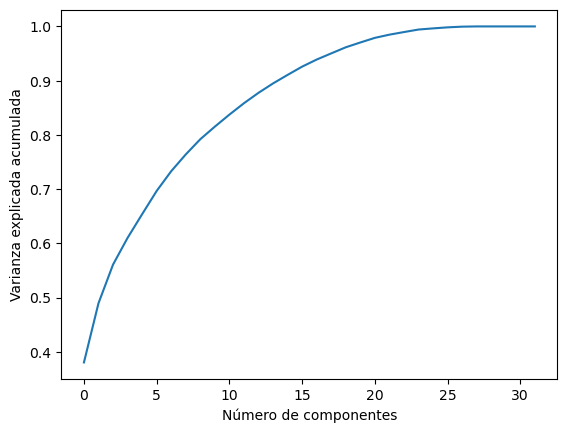

In [139]:
sns.lineplot(varianza_acumulada).set(xlabel='Número de componentes', ylabel='Varianza explicada acumulada')

In [140]:
varianza_acumulada

array([0.38039853, 0.48956117, 0.56084037, 0.61011791, 0.65374254,
       0.6966531 , 0.73306802, 0.76395533, 0.7920222 , 0.81522858,
       0.83737353, 0.85837566, 0.87755668, 0.89488942, 0.91060372,
       0.92585375, 0.93888595, 0.95026212, 0.96150584, 0.97037738,
       0.9788907 , 0.98480337, 0.98959889, 0.99425166, 0.99636817,
       0.99828825, 0.9995725 , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [141]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\L

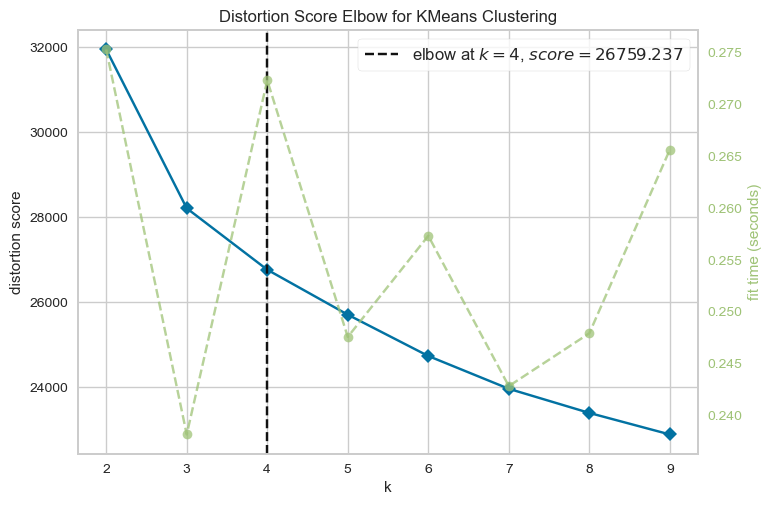

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [142]:
Elbow_M = KElbowVisualizer(KMeans(random_state=100), k=(2, 10))
Elbow_M.fit(clientes_procesado)
Elbow_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


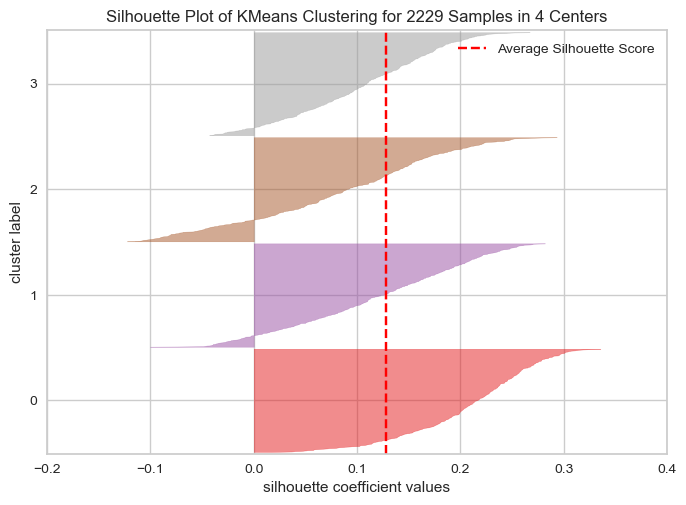

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [143]:
from yellowbrick.cluster import SilhouetteVisualizer
Sil_M = SilhouetteVisualizer(KMeans(4, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


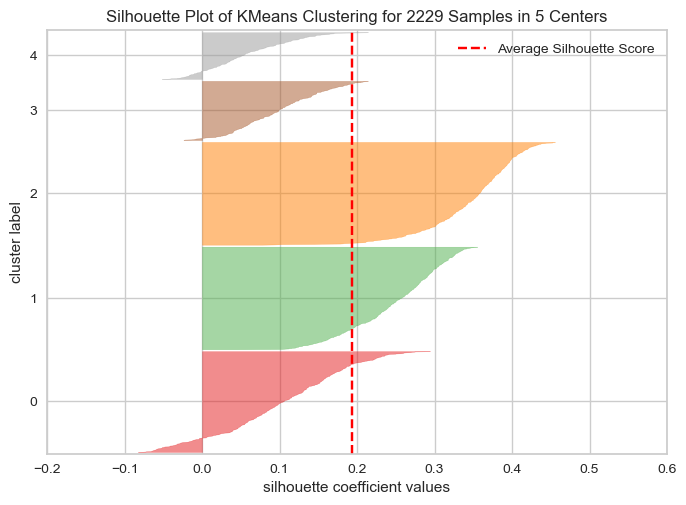

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [167]:
Sil_M = SilhouetteVisualizer(KMeans(5, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


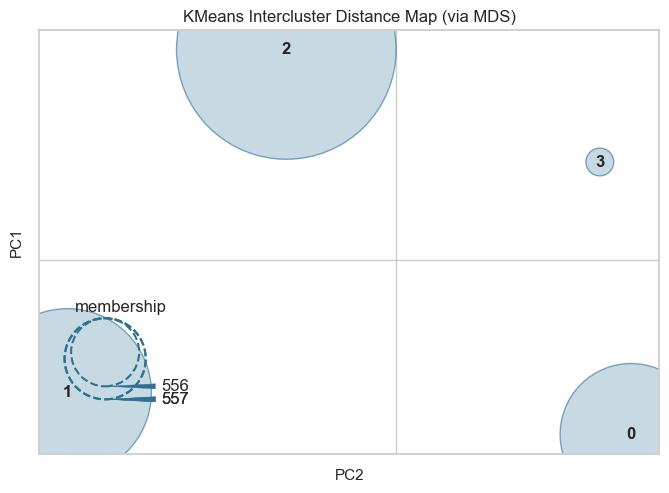

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [145]:
from yellowbrick.cluster import InterclusterDistance
Inter_M = InterclusterDistance(KMeans(4, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


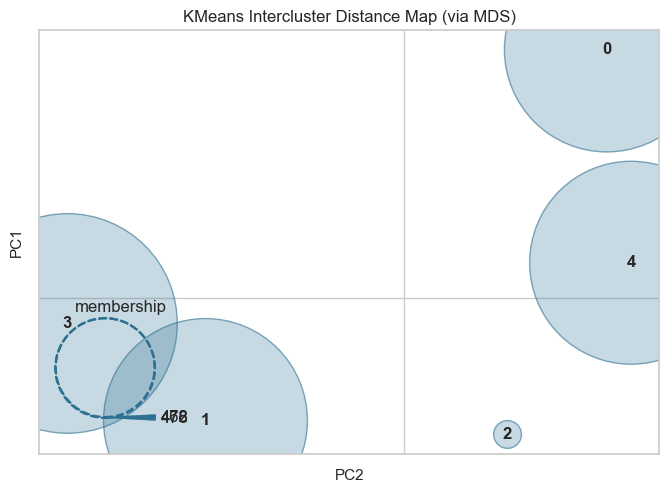

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [146]:
from yellowbrick.cluster import InterclusterDistance
Inter_M = InterclusterDistance(KMeans(5, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

In [147]:
KM = KMeans(n_clusters=4, random_state=100)
# Entrenar el modelo y predecir los clusters
yhat_KM = KM.fit_predict(clientes_procesado)
#Añadir el atributo de clusters al dataset original
clientes_procesado["cluster"] = yhat_KM

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [148]:
clientes_procesado

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,AcceptedCmp1,Complain,Response,cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,0.288163,-0.824830,-0.930009,0.304678,0.981897,1.553973,1.677867,2.470116,1.472821,0.850550,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2174,-0.262318,1.032287,0.906120,-0.386159,-0.870437,-0.636301,-0.713690,-0.650938,-0.632110,-0.729684,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4141,0.917104,-0.824830,-0.930009,-0.800660,0.361484,0.572126,-0.177804,1.350208,-0.148218,-0.035923,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
6182,-1.181716,1.032287,-0.930009,-0.800660,-0.870437,-0.560775,-0.651686,-0.504065,-0.583721,-0.748955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5324,0.295398,1.032287,-0.930009,1.548183,-0.389542,0.421072,-0.217663,0.156864,-0.003050,-0.556244,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.432154,-0.824830,0.906120,-0.109824,1.201564,0.421072,0.065780,0.083427,2.198659,3.914662,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4001,0.562423,2.889404,0.906120,0.235594,0.302114,-0.661477,-0.607398,-0.687657,-0.656304,-0.691142,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
7270,0.234160,-0.824830,-0.930009,1.444558,1.792292,0.546950,0.220789,-0.100164,-0.365969,-0.382803,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


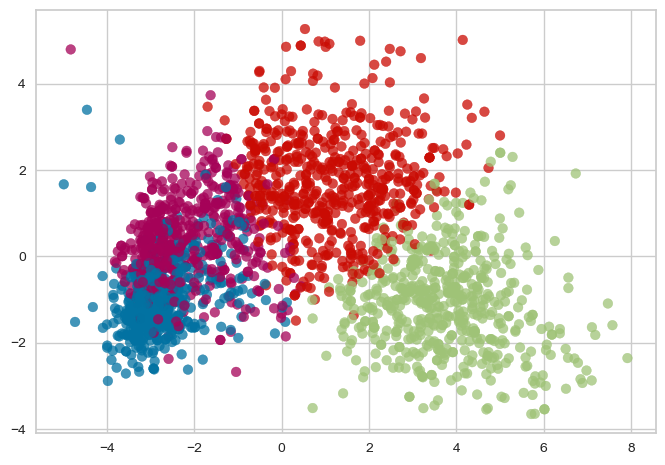

In [149]:
from yellowbrick.features import PCA as yb_pca
pca_viz = yb_pca(scale=True, projection=2, random_state=100).fit_transform(clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"])




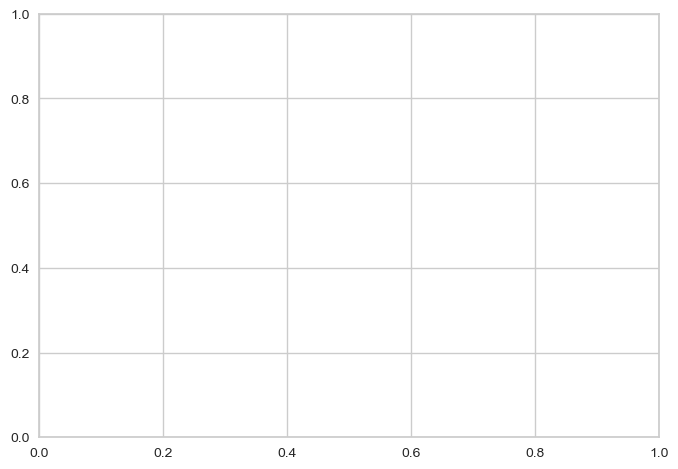

In [150]:
pca_components = yb_pca(scale=True, projection=2, random_state=100).fit(clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"]).pca_components_

In [151]:
pca_detail = pd.DataFrame(pca_components, columns=clientes_procesado.drop("cluster", axis=1).columns, index=["PC1","PC2"]).T

In [152]:
pca_detail.sort_values("PC1", key=abs, ascending=False)

,PC1,PC2
MntTotal,0.335281,-0.015697
Income,0.298878,0.002349
NumPurchases,0.296677,0.274189
NumCatalogPurchases,0.291516,-0.015041
MntWines,0.282413,0.135572
MntMeatProducts,0.281251,-0.156086
NumStorePurchases,0.269137,0.132613
MntFishProducts,0.246598,-0.174850
MntSweetProducts,0.238532,-0.146762
MntFruits,0.237310,-0.161579


In [153]:
pca_detail.sort_values("PC2", key=abs, ascending=False)

,PC1,PC2
NumDealsPurchases,-0.018298,0.454864
Teenhome,-0.030367,0.449271
NumWebPurchases,0.211165,0.302203
NumPurchases,0.296677,0.274189
Age,0.060033,0.269942
NumWebVisitsMonth,-0.209742,0.246486
dias registrados,0.045625,0.186638
Education_PhD,0.012351,0.181737
MntFishProducts,0.246598,-0.174850
MntFruits,0.237310,-0.161579


In [154]:
pca_viz

array([[ 4.56570785, -0.43996003],
       [-2.77355506, -0.61206854],
       [ 1.97037076, -0.34623102],
       ...,
       [ 1.60243433, -0.6876003 ],
       [ 2.15772013,  1.05889619],
       [-1.72586395,  1.8101584 ]])

[Text(0, 0, '556'), Text(0, 0, '557'), Text(0, 0, '561'), Text(0, 0, '555')]

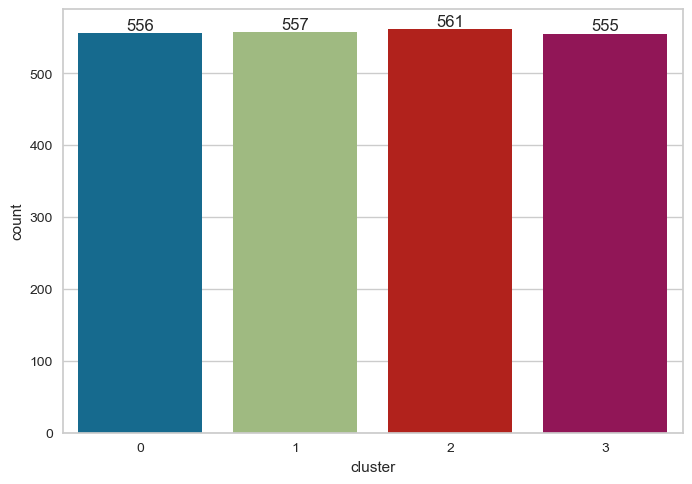

In [155]:
ax = sns.countplot(x=clientes_procesado["cluster"])
ax.bar_label(ax.containers[0])

In [156]:
clientes["cluster"] = yhat_KM

In [157]:
clientes

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,Age,dias registrados,MntTotal,NumPurchases,cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,1,57,663,1617,25,1
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,60,113,27,6,3
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,49,312,776,21,2
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,30,139,53,8,0
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,33,161,422,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,47,381,1341,18,2
4001,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,1,0,0,68,19,444,22,2
7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,0,0,33,155,1241,19,1


<Axes: xlabel='cluster', ylabel='NumStorePurchases'>

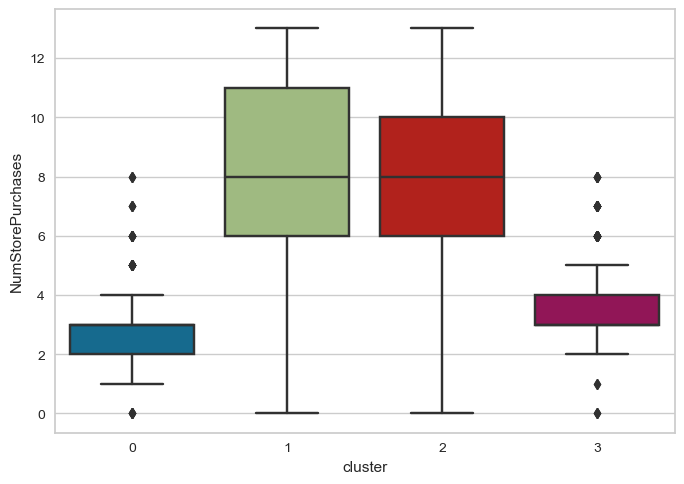

In [159]:
sns.boxplot(data=clientes, x="cluster", y="NumStorePurchases")

<Axes: xlabel='cluster', ylabel='NumCatalogPurchases'>

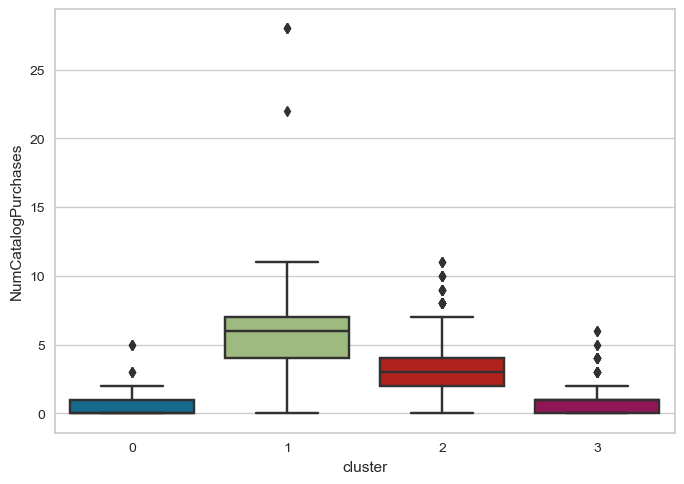

In [160]:
sns.boxplot(data=clientes, x="cluster", y="NumCatalogPurchases")

<Axes: xlabel='cluster', ylabel='NumPurchases'>

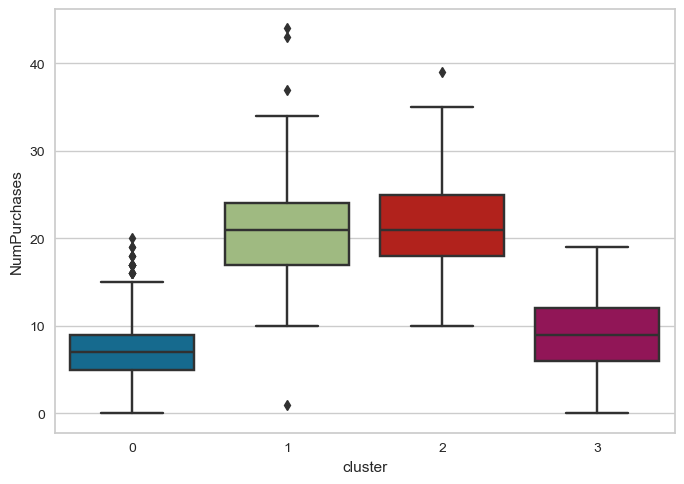

In [168]:
sns.boxplot(data=clientes, x="cluster", y="NumPurchases")

<Axes: xlabel='cluster', ylabel='MntTotal'>

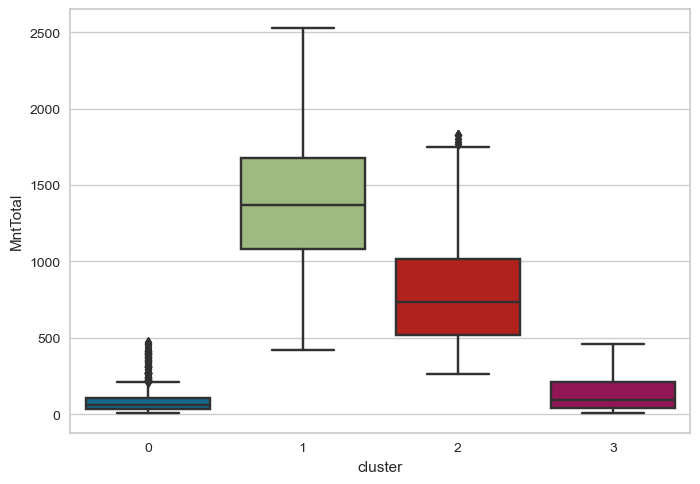

In [169]:
sns.boxplot(data=clientes, x="cluster", y="MntTotal")

<Axes: xlabel='cluster', ylabel='Kidhome'>

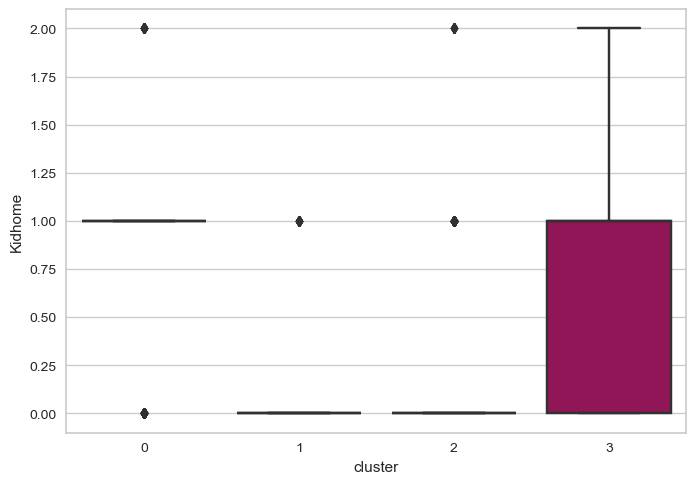

In [162]:
sns.boxplot(data=clientes, x="cluster", y="Kidhome")

<Axes: xlabel='cluster', ylabel='NumWebVisitsMonth'>

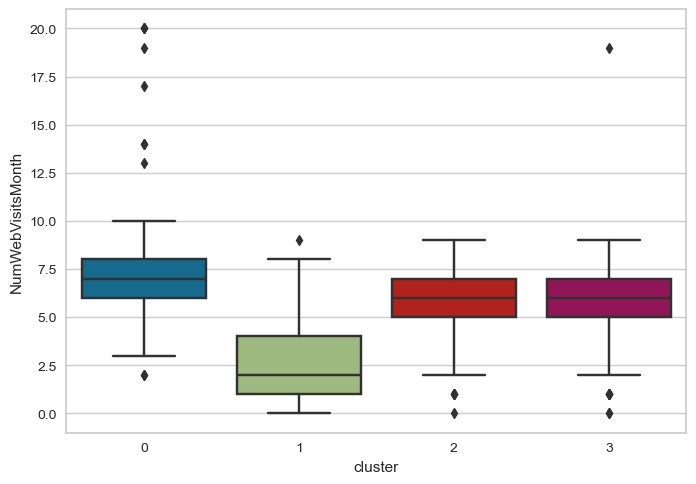

In [163]:
sns.boxplot(data=clientes, x="cluster", y="NumWebVisitsMonth")

In [164]:
clientes.groupby("cluster")["Income"].mean()

cluster
0    29323.436268
1    76295.970614
2    59028.510975
3    43085.376697
Name: Income, dtype: float64